## Shark Attack

In [1]:
import pandas as pd
import numpy as np

### 1. Download the data

Load file into pandas dataframe:

In [2]:
sharks = pd.read_csv('attacks.csv', sep = ',',encoding = "ISO-8859-1")

Compare the loaded columns with those of the Excel file. Is there information we should remove? Note: with columns we can get the list of columns from the DataFrame.

In [3]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
sharks = sharks.drop(labels = ['Unnamed: 22','Unnamed: 23'], axis = 1)

### 2.  Null values 

Identify the columns in which there are null values ​​and those without and how many in each. For example, there seem to be them in the Species column. Note: use isnull ()

In [5]:
sharks.shape

(25723, 22)

In [6]:
sharks.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
dtype: int64

We take those columns whose 'Case Number' is not null since it is the record number.

#### Case Number

In [7]:
# Case number not null
sharks = sharks[sharks['Case Number'].notnull()].reset_index()

In [8]:
# shape of dataframe
sharks.shape

(8702, 23)

#### Year

Since we are going to have to use the variable 'Year' a lot, we are going to clean this variable with a filter:

In [9]:
sharks['Year_cleaned'] = sharks[sharks['Year']>1930]['Year']

<AxesSubplot:title={'center':'Shark Attacks per year'}>

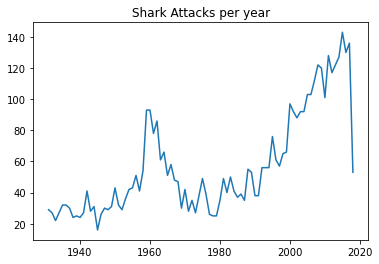

In [10]:
Years_values = sharks['Year_cleaned'].value_counts().sort_index()
%matplotlib inline
Years_values.plot(title="Shark Attacks per year")

For the columns with categorical information, look at the labels for each category, for example, the species of sharks or the type of incident.

#### Type

In [11]:
sharks.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

Text(0, 0.5, 'Type')

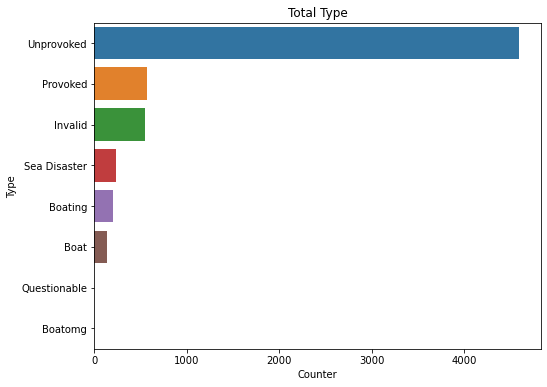

In [13]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

# we count for each type the number of records there are
table_count = sharks['Type'].value_counts()
type_index = table_count.index # index - type
type_values = table_count.values # columns - count of values

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = type_values , y = type_index , ax =ax , orient='h') # specific type of chart
plt.title('Total Type')
plt.xlabel('Counter')
plt.ylabel('Type')

#### Species

In [14]:
sharks['Species '].unique()

array(['White shark', nan, '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [15]:
len(list(sharks['Species '].unique()))

1550

<AxesSubplot:>

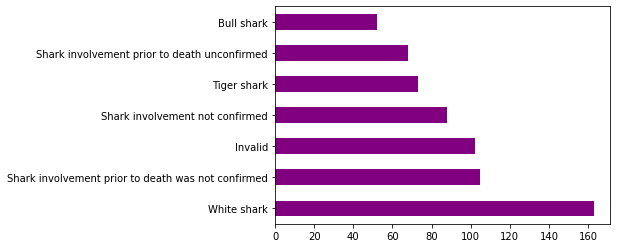

In [17]:
shark = sharks['Species '].value_counts()
shark[shark>50].plot.barh(color='purple')

### 3. More null values

We are going to examine the occurrence of events by years and countries. For it:

We want to use as index (country, year) first. Try setting it with set_index (). Is there a null value problem in the index? Are they NA or are there also invalid years? How can they be removed?

In [18]:
# to avoid null value problems we take those NON-NULL records of the year and the Country
sharks1 = sharks[(sharks.Country.notnull()) & (sharks.Year_cleaned.notnull())]

In [19]:
bycountry_year = sharks1.set_index(['Country', 'Year_cleaned'])

In [20]:
bycountry_year.head(5)

index Case Number         Date    Year        Type  \
Country   Year_cleaned                                                       
USA       2018.0            0  2018.06.25  25-Jun-2018  2018.0     Boating   
          2018.0            1  2018.06.18  18-Jun-2018  2018.0  Unprovoked   
          2018.0            2  2018.06.09  09-Jun-2018  2018.0     Invalid   
AUSTRALIA 2018.0            3  2018.06.08  08-Jun-2018  2018.0  Unprovoked   
MEXICO    2018.0            4  2018.06.04  04-Jun-2018  2018.0    Provoked   

                                   Area                        Location  \
Country   Year_cleaned                                                    
USA       2018.0             California     Oceanside, San Diego County   
          2018.0                Georgia  St. Simon Island, Glynn County   
          2018.0                 Hawaii                    Habush, Oahu   
AUSTRALIA 2018.0        New South Wales              Arrawarra Headland   
MEXICO    2018.0                 Colima                        La Ticla   

                           Activity             Name Sex   ... Fatal (Y/N)  \
Country   Year_cleaned                                     ...               
USA       2018.0           Paddling      Julie Wolfe    F  ...           N   
          2018.0           Standing  Adyson McNeely     F  ...           N   
          2018.0            Surfing      John Denges    M  ...           N   
AUSTRALIA 2018.0            Surfing             male    M  ...           N   
MEXICO    2018.0        Free diving   Gustavo Ramos     M  ...           N   

                                 Time         Species   \
Country   Year_cleaned                                   
USA       2018.0                18h00      White shark   
          2018.0        14h00  -15h00              NaN   
          2018.0                07h45              NaN   
AUSTRALIA 2018.0                  NaN        2 m shark   
MEXICO    2018.0                  NaN  Tiger shark, 3m   

                                Investigator or Source  \
Country   Year_cleaned                                   
USA       2018.0                      R. Collier, GSAF   
          2018.0        K.McMurray, TrackingSharks.com   
          2018.0        K.McMurray, TrackingSharks.com   
AUSTRALIA 2018.0                        B. Myatt, GSAF   
MEXICO    2018.0                             A .Kipper   

                                             pdf  \
Country   Year_cleaned                             
USA       2018.0            2018.06.25-Wolfe.pdf   
          2018.0          2018.06.18-McNeely.pdf   
          2018.0           2018.06.09-Denges.pdf   
AUSTRALIA 2018.0        2018.06.08-Arrawarra.pdf   
MEXICO    2018.0            2018.06.04-Ramos.pdf   

                                                             href formula  \
Country   Year_cleaned                                                      
USA       2018.0        http://sharkattackfile.net/spreadsheets/pdf_di...   
          2018.0        http://sharkattackfile.net/spreadsheets/pdf_di...   
          2018.0        http://sharkattackfile.net/spreadsheets/pdf_di...   
AUSTRALIA 2018.0        http://sharkattackfile.net/spreadsheets/pdf_di...   
MEXICO    2018.0        http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                                     href  \
Country   Year_cleaned                                                      
USA       2018.0        http://sharkattackfile.net/spreadsheets/pdf_di...   
          2018.0        http://sharkattackfile.net/spreadsheets/pdf_di...   
          2018.0        http://sharkattackfile.net/spreadsheets/pdf_di...   
AUSTRALIA 2018.0        http://sharkattackfile.net/spreadsheets/pdf_di...   
MEXICO    2018.0        http://sharkattackfile.net/spreadsheets/pdf_di...   

                       Case Number.1 Case Number.2 original order  
Country   Year_cleaned                                             
USA      

Obtain the account of incidents in the USA in 2014 and 2015. Use loc and iloc in the same expression.


In [21]:
bycountry_year['Case Number'].loc['USA',2014].count()

<ipython-input-21-c6ac8bc13d55>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  bycountry_year['Case Number'].loc['USA',2014].count()


66

In [22]:
bycountry_year['Case Number'].loc['USA',2015].count()

<ipython-input-22-15ee3f8e03f7>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  bycountry_year['Case Number'].loc['USA',2015].count()


73

## 4. Distributions and correlations

- Show the three countries with the most incidents.

<AxesSubplot:>

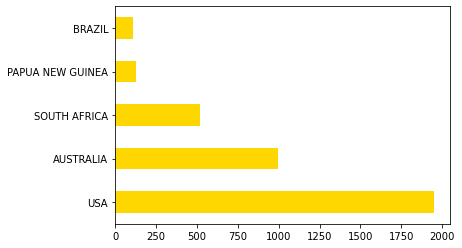

In [23]:
#### Show the three countries with the most incidents.
### Way 1
sharks1.groupby("Country")\
  .filter(lambda x: len(x) > 100)\
  .Country.value_counts()\
  .plot.barh(color='gold')

In [24]:
from collections import Counter
Country_values = sharks1['Country'].sort_index()
country_counter = Counter(Country_values).most_common(3)
country_counter

[('USA', 1950), ('AUSTRALIA', 995), ('SOUTH AFRICA', 518)]

- Draw the distribution by years of the incidents, indicate the year in which the most occurred.

<AxesSubplot:>

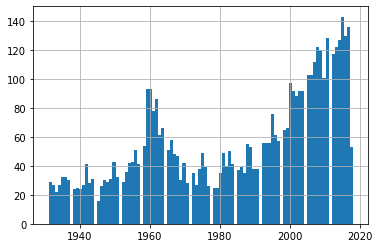

In [26]:
Years_values = sharks['Year_cleaned'].sort_index()
%matplotlib inline
Years_values.hist(bins = 100)

In [27]:
# top ten
year_counter = Counter(Years_values).most_common(10)

In [28]:
year_counter

[(2015.0, 143),
 (2017.0, 136),
 (2016.0, 130),
 (2011.0, 128),
 (2014.0, 127),
 (2013.0, 122),
 (2008.0, 122),
 (2009.0, 120),
 (2012.0, 117),
 (2007.0, 112)]

• For the two countries with the most incidents, show their evolution by years

In [30]:
# we take the country as an index
bycountry = sharks1.set_index('Country')

<AxesSubplot:>

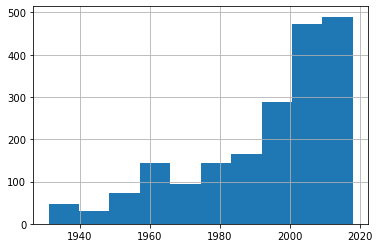

In [31]:
by_usa = bycountry.loc['USA']
by_usa['Year_cleaned'].hist()

<AxesSubplot:>

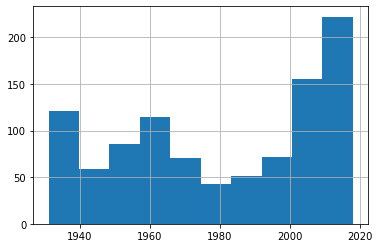

In [32]:
by_aust = bycountry.loc['AUSTRALIA']
by_aust['Year_cleaned'].hist()

## 5. Distributions and correlations (ii) 
Next, we want to examine the gender and age of those involved in incidents. Show the distribution of the incidents by sex, and try to obtain the average age of those involved in the incidents.

Observed:

- Null values ​​or values ​​that appear incorrect.
- The type of the values ​​in the "Age" column. If you need to change them, look for ways to convert from string values ​​to numeric values ​​in pandas.

In [33]:
# Age
# we take only those expressions that have a number at the beginning and later we pass it to integer
sharks['Age_Clean'] = sharks['Age'].str.extract("([0-9]+)", expand=False).dropna().astype(int)
# we calculate the mean
sharks['Age_Clean'].mean()

27.315605928509154

In [35]:
# Sex
sharks['Sex '].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [36]:
# we fix these values:
sharks[sharks['Sex ']=='M ']='M'
sharks[sharks['Sex ']=='N']=float('nan')
sharks[sharks['Sex ']=='.']=float('nan')
sharks[sharks['Sex ']=='lli']=float('nan')

In [37]:
sharks['Sex '].unique()

array(['F', 'M', nan], dtype=object)

<AxesSubplot:>

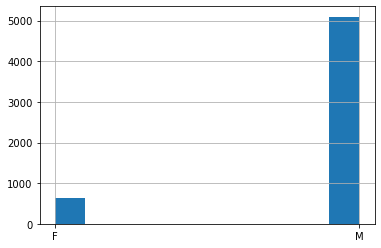

In [38]:
# histogram
sharks[sharks['Sex '].isin(['M','F'])]["Sex "].hist()

<AxesSubplot:>

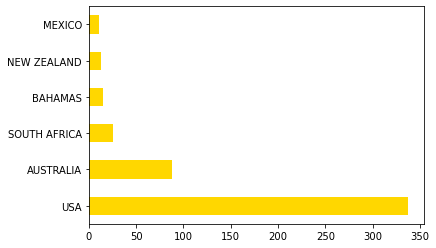

In [39]:
# we group by sex
bysex = sharks[sharks['Sex '].notnull()].set_index('Sex ')

# consider female
female = bysex.loc['F']
female = female[female['Country'].notnull()]

# by country - female
female.groupby("Country")\
  .filter(lambda x: len(x) > 10)\
  .Country.value_counts()\
  .plot.barh(color='gold')

<AxesSubplot:>

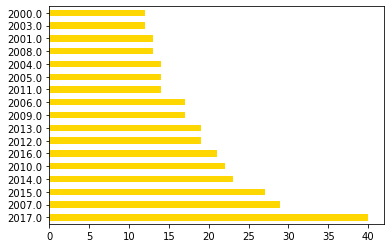

In [40]:
# by year - female
female = female[female['Year_cleaned'].notnull()]
female.groupby("Year_cleaned")\
  .filter(lambda x: len(x) > 10)\
  .Year_cleaned.value_counts()\
  .plot.barh(color='gold')

<AxesSubplot:title={'center':'Was the attack fatal?'}>

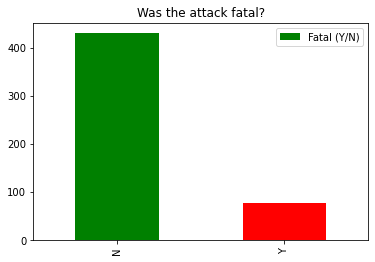

In [41]:
# female - attacks fatal
female[female['Fatal (Y/N)'].isin(['Y','N'])]["Fatal (Y/N)"].value_counts()\
    .plot(kind='bar', title= "Was the attack fatal?",legend = True, color= ['green','red'])

Text(0, 0.5, 'Year')

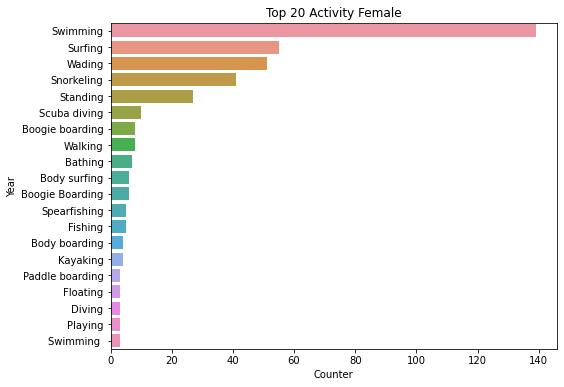

In [42]:
# Top 20 Activity
table_count = Counter(female['Activity'].dropna().tolist()).most_common(20)
table_count_index = [table[0] for table in table_count]
table_count_values = [table[1] for table in table_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = table_count_values , y=table_count_index,ax=ax,orient='h')
plt.title('Top 20 Activity Female')
plt.xlabel('Counter')
plt.ylabel('Year')

Text(0, 0.5, 'Year')

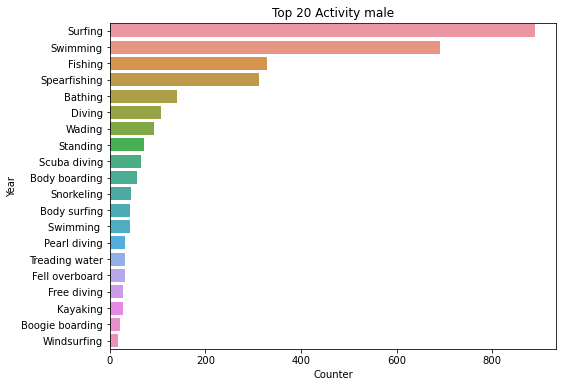

In [44]:
male = bysex.loc['M']
table_count = Counter(male['Activity'].dropna().tolist()).most_common(20)
table_count_index = [table[0] for table in table_count]
table_count_values = [table[1] for table in table_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = table_count_values , y=table_count_index,ax=ax,orient='h')
plt.title('Top 20 Activity male')
plt.xlabel('Counter')
plt.ylabel('Year')